# 2.Ordinary differential equation

## Freefall
\begin{eqnarray*}
F=ma\\
F=m\frac{dv}{dt}\\
F=m\frac{d^2x}{dt^2}
\end{eqnarray*}

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

In [92]:
g = 9.80665#[m/s2]
t0 = 0#[sec]
dt = 0.1#[sec]

v0 = 0#[m/s]
y0 = 100#[m]

In [93]:
t_result=[t0]
v_result=[v0]
y_result=[y0]
y=y0
v=v0
t=t0
while y >=0:
    t+=dt
    v+=g*dt
    y-=v*dt
    t_result.append(t)
    v_result.append(v)
    y_result.append(y)


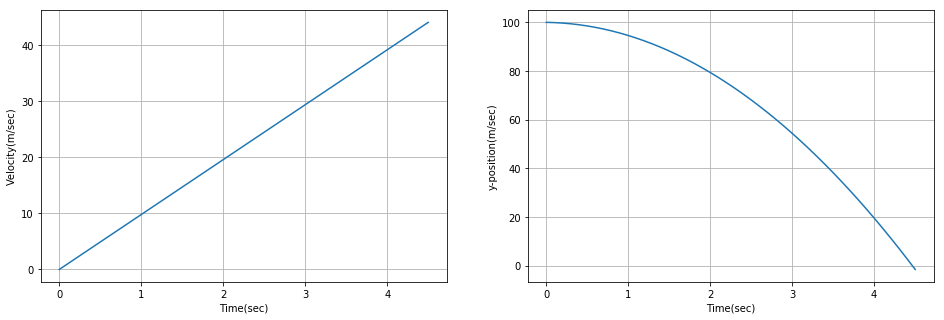

In [94]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 5))

ax1.plot(t_result, v_result)
ax1.grid()
ax1.set_xlabel('Time(sec)')
ax1.set_ylabel('Velocity(m/sec)')

ax2.plot(t_result, y_result)
ax2.grid()
ax2.set_xlabel('Time(sec)')
ax2.set_ylabel('y-position(m/sec)')
plt.show()
plt.show()

## Landing simulation
\begin{eqnarray*}
\frac{dv}{dt}=g-a\\
\frac{dx}{dt}=v
\end{eqnarray*}

In [83]:
g = 9.80665#[m/s2]
a = -1.2

tc = 2#[sec]
t_lim=10

t0 = 0#[sec]
dt = 0.1#[sec]

v0 = 0#[m/s]
y0 = 100#[m]

In [84]:
def retrofire(t, tf, g, f):
    if t >= tf:
        return g*f
    else:
        return 0.0

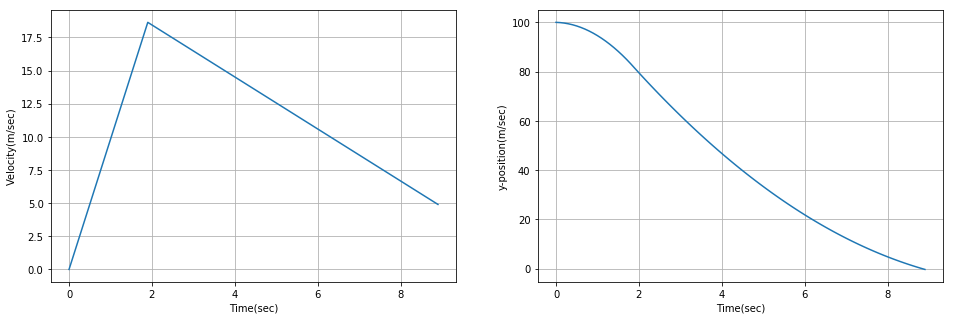

In [90]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 5))

ax1.plot(t_result, v_result)
ax1.grid()
ax1.set_xlabel('Time(sec)')
ax1.set_ylabel('Velocity(m/sec)')

ax2.plot(t_result, y_result)
ax2.grid()
ax2.set_xlabel('Time(sec)')
ax2.set_ylabel('y-position(m/sec)')
plt.show()
plt.show()

## Motion in 2 dimensional space simulation

\begin{eqnarray*} 
\mathbf{F}=m\mathbf{a}\\
\mathbf{F}=m\frac{d\mathbf{v}}{dt}\\
\mathbf{F}=m\frac{d^2\mathbf{x}}{dt^2}\\
\mathbf{F} = (F_{0,1}, F_{0,2})\\
\mathbf{x} = (x_{0,1}, x_{0,2})\\
\mathbf{v} = (v_{0,1}, v_{0,2})\\
\mathbf{a} = (a_{0,1}, a_{0,2})
\end{eqnarray*}

\begin{eqnarray*}  
F_{1,1}=\frac{x_{0,1}-x_{1,1}}{r_1} \times \frac{kq_1}{r_1^2}\\  
F_{1,2}=\frac{x_{0,2}-x_{1,2}}{r_1} \times \frac{kq_2}{r_1^2}\\  
r_i^2=(x_{0,1} - x_{i,1})^2+(x_{0,2} - x_{i,2})^2
\end{eqnarray*}

In [159]:
import math

m=1#[kg]
k=1
t=0

Q1 = ((0, 0), 10)#Position and charge((x1, x2),q)
Q2 = ((5, -5), 5)#Position and charge((x1, x2),q)
Q = (Q1, Q2)

t_lim = 25.0#[sec] Time limit
r_lim = 0.1#[m] Minimum of distance r
dt = 0.01#[sec] Delta time


v_01_ini = -2#Initial velocity with x1 axis
v_02_ini = 1#Initial velocity with x2 axis
x_01_ini = 2#Initial position with x1 axis
x_02_ini = 2#Initial position with x2 axis

v_01 = v_01_ini
v_02 = v_02_ini
x_01 = x_01_ini
x_02 = x_02_ini

t_rlt = [t]
x_01_rlt = [x_01]
x_02_rlt = [x_02]
v_01_rlt = [v_01]
v_02_rlt = [v_02]

while t < t_lim:
    t = t + dt
    rmin = float('inf')
    for qi in Q:
        rx_i1 = qi[0][0] - x_01
        rx_i2 = qi[0][1] - x_02
        r = math.sqrt(rx_i1**2 + rx_i2**2)
        if r < rmin:
            rmin = r
        v_01 += (rx_i1/r**3 * k*qi[1]) * dt/m
        v_02 += (rx_i2/r**3 * k*qi[1]) * dt/m
    x_01 += v_01 * dt
    x_02 += v_02 * dt
    t_rlt.append(t)
    x_01_rlt.append(x_01)
    x_02_rlt.append(x_02)
    v_01_rlt.append(v_01)
    v_02_rlt.append(v_02)    
    #print('{:.7f}{:.7f}{:.7f}{:.7f}{:.7f}'.format(t, x_01, x_02, v_01, v_02))



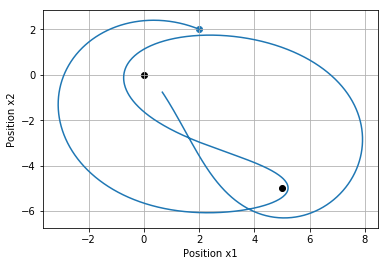

In [160]:
plt.scatter(Q1[0][0],Q1[0][1], color='black')
plt.scatter(Q2[0][0],Q2[0][1], color='black')
plt.scatter(x_01_ini,x_02_ini, color=new_colors[0])
plt.plot(x_01_rlt, x_02_rlt)
plt.grid()
plt.xlabel('Position x1')
plt.ylabel('Position x2')
plt.show()